**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

**Import Leaf Data Set**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving leaf.csv to leaf.csv


In [ ]:
# Load the uploaded 'leaf.csv' file into a DataFrame
Leaf_data = pd.read_csv('leaf.csv')

# Display a preview of the DataFrame
print(Leaf_data)


      1  1.1  0.72694  1.4742  0.32396  0.98535      1.2   0.83592  0.0046566  \
0     1    2  0.74173  1.5257  0.36116  0.98152  0.99825  0.798670   0.005242   
1     1    3  0.76722  1.5725  0.38998  0.97755  1.00000  0.808120   0.007457   
2     1    4  0.73797  1.4597  0.35376  0.97566  1.00000  0.816970   0.006877   
3     1    5  0.82301  1.7707  0.44462  0.97698  1.00000  0.754930   0.007428   
4     1    6  0.72997  1.4892  0.34284  0.98755  1.00000  0.844820   0.004945   
..   ..  ...      ...     ...      ...      ...      ...       ...        ...   
334  36    6  0.37522  1.1417  0.81725  0.68511  0.58772  0.125230   0.091860   
335  36    7  0.28064  1.0849  0.75319  0.72152  0.71404  0.136860   0.078996   
336  36    8  0.35344  1.0329  0.78147  0.70737  0.61579  0.135030   0.089763   
337  36    9  0.59988  1.1427  0.71532  0.66101  0.47544  0.157470   0.113370   
338  36   10  0.47195  1.0901  0.85409  0.53598  0.39649  0.078376   0.132270   

     0.0039465   0.04779   

**Assign Column Names To A Dataset**

In [ ]:
# Define column names based on your dataset structure
column_names = [
    'Species', 'Specimen Number', 'Eccentricity', 'Aspect Ratio', 'Elongation',
    'Solidity', 'Stochastic Convexity', 'Isoperimetric Factor',
    'Maximal Indentation Depth', 'Lobedness', 'Average Intensity',
    'Average Contrast', 'Smoothness', 'Third moment', 'Uniformity','Entropy'
]

# Assign column names to the DataFrame
Leaf_data.columns = column_names

# Display the DataFrame with column names
print(Leaf_data.head())


   Species  Specimen Number  Eccentricity  Aspect Ratio  Elongation  Solidity  \
0        1                2       0.74173        1.5257     0.36116   0.98152   
1        1                3       0.76722        1.5725     0.38998   0.97755   
2        1                4       0.73797        1.4597     0.35376   0.97566   
3        1                5       0.82301        1.7707     0.44462   0.97698   
4        1                6       0.72997        1.4892     0.34284   0.98755   

   Stochastic Convexity  Isoperimetric Factor  Maximal Indentation Depth  \
0               0.99825               0.79867                   0.005242   
1               1.00000               0.80812                   0.007457   
2               1.00000               0.81697                   0.006877   
3               1.00000               0.75493                   0.007428   
4               1.00000               0.84482                   0.004945   

   Lobedness  Average Intensity  Average Contrast  Smoot

In [ ]:
# print all columns in data set
print(Leaf_data.columns)

Index(['Species', 'Specimen Number', 'Eccentricity', 'Aspect Ratio',
       'Elongation', 'Solidity', 'Stochastic Convexity',
       'Isoperimetric Factor', 'Maximal Indentation Depth', 'Lobedness',
       'Average Intensity', 'Average Contrast', 'Smoothness', 'Third moment',
       'Uniformity', 'Entropy'],
      dtype='object')


***Slicing: To separate the target column from the features in a dataset***

In [ ]:
X = Leaf_data.drop('Species', axis=1)  # Extracting features by dropping the target column
y = Leaf_data['Species']  # Extracting the target column
X
y

0       1
1       1
2       1
3       1
4       1
       ..
334    36
335    36
336    36
337    36
338    36
Name: Species, Length: 339, dtype: int64

***Shuffling***

In [ ]:
X, y = shuffle(X, y, random_state=42)
X
y

284    31
116    11
113    11
42      5
126    12
       ..
188    23
71      8
106    10
270    30
102    10
Name: Species, Length: 339, dtype: int64

**Split Data Into Training And Testing sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Assuming X_train, X_test, Y_train, Y_test are NumPy arrays
print("X_train shape:", X_train.shape)  # Number of rows and columns in X_train
print("X_test shape:", X_test.shape)    # Number of rows and columns in X_test
print("y_train shape:", y_train.shape)  # Number of rows in Y_train
print("y_test shape:", y_test.shape)    # Number of rows in Y_test

X_train shape: (271, 15)
X_test shape: (68, 15)
y_train shape: (271,)
y_test shape: (68,)


**Now Apply KNN**

In [ ]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors

# Perform cross-validation
knn_scores = cross_val_score(knn, X, y, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation Accuracy
print("Cross-validation Accuracy:", knn_scores*100)

print("Mean accuracy:", knn_scores.mean()*100)  # Mean accuracy across all folds

Cross-validation Accuracy: [13.23529412 13.23529412 13.23529412 16.17647059 19.40298507]
Mean accuracy: 15.057067603160668


**Training Accuracy For KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target variable

# Initialize KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the entire dataset
knn.fit(X, y)

# Calculate training accuracy
training_accuracy = knn.score(X, y) * 100
print("Training Accuracy:", training_accuracy)


Training Accuracy: 36.283185840707965


***Naive Bayes***

In [ ]:
# Initialize the Gaussian Naive Bayes classifier
nb = GaussianNB()

# Perform cross-validation
nb_scores = cross_val_score(nb, X, y, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", nb_scores*100)
print("Mean accuracy:", nb_scores.mean()*100)  # Mean accuracy across all folds

Cross-validation scores: [70.58823529 72.05882353 70.58823529 73.52941176 70.14925373]
Mean accuracy: 71.38279192273924


**Training Accuracy For Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target variable

# Initialize Gaussian Naive Bayes classifier
nb = GaussianNB()

# Fit the model on the entire dataset
nb.fit(X, y)

# Calculate training accuracy
training_accuracy = nb.score(X, y) * 100
print("Training Accuracy:", training_accuracy)


Training Accuracy: 84.36578171091446


***Support Vector Machine ( SVM )***

In [ ]:
# Initialize the SVM classifier
svm = SVC(kernel='linear')
# Perform cross-validation (e.g., 5-fold cross-validation)
svm_scores = cross_val_score(svm, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", svm_scores*100)
print("Mean accuracy:", svm_scores.mean()*100)  # Mean accuracy across all folds

Cross-validation scores: [52.94117647 42.64705882 54.41176471 52.94117647 40.29850746]
Mean accuracy: 48.64793678665496


**Training Accuracy for Svm**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target variable

# Initialize SVM classifier with a linear kernel
svm = SVC(kernel='linear')

# Fit the model on the entire dataset
svm.fit(X, y)

# Calculate training accuracy
training_accuracy = svm.score(X, y) * 100
print("Training Accuracy:", training_accuracy)


Training Accuracy: 61.6519174041298


***Make Bar Plot***

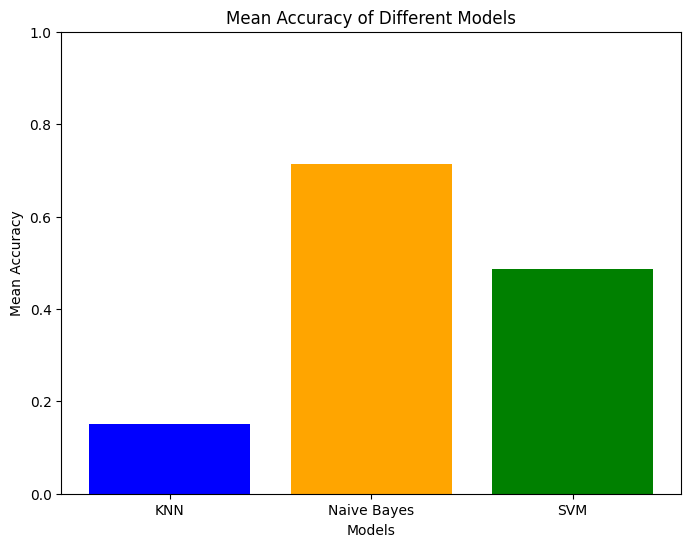

In [ ]:
scores = [knn_scores.mean(), nb_scores.mean(), svm_scores.mean()]
models = ['KNN', 'Naive Bayes', 'SVM']
# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(models, scores, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy of Different Models')
plt.ylim(0, 1)
plt.show()

**Conculsion**:

With a mean accuracy of approximately **71.3%**, the **Naive Bayes model** outperforms both **KNN** and **SVM**. This suggests that **Naive Bayes** might be well-suited for this dataset and its classification task. The relatively higher accuracy implies that Naive Bayes is better at capturing patterns and making predictions compared to the other models used in this analysis.***Naive Bayes*** classifier seems to be a good model choice for this particular dataset.